<a href="https://colab.research.google.com/github/YuktiMohan/Tensorflow-in-Practice/blob/master/Lesson%201%3A%20Introduction/1C%3A%20Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Loading the Fashion MNIST dataset and segregating it into training and testing sets

fashion_mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


1
[[  0   0   0   0   0   0   0   0   0 228 215 204 211  63 114 224 200 218 208   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 232 204 203 215 228 221 209 204 205 236   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  34 243 193 196 188 195 192 192 196 198 244  21   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  90 239 193 200 198 201 198 198 199 193 242  74   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 116 228 193 200 197 200 198 197 200 192 236 105   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 146 221 195 199 197 199 197 198 198 193 226 133   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 157 216 196 199 198 201 200 198 199 193 215 162   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 161 216 194 201 201 205 198 203 198 195 212 166   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151 218 194 196 229 152 127 233 192 194 216 

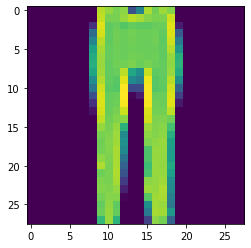

In [0]:
#To visualise the kind of data we are working with

np.set_printoptions(linewidth=200)
plt.imshow(training_images[106])
print(training_labels[106])
print(training_images[106])

In [0]:
#Normalising the training and testing images

training_images = training_images/255.0
testing_images = testing_images/255.0

In [0]:
model = keras.models.Sequential([ 
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation='softmax')
])

- **Sequential**: That defines a SEQUENCE of layers in the neural network

- **Flatten**: It converts a 2D array (here, 28X28) into a 1D array (here, 784X1)

- **Dense**: Adds a layer of neurons

- Each layer of neurons need an **activation function** to tell them what to do. For example:

  1. **Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

  2. **Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4739 - accuracy: 0.8308
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3608 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3236 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2996 - accuracy: 0.8885
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2653 - accuracy: 0.9004
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2534 - accuracy: 0.9046
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2407 - accuracy: 0.9097
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2313 - accuracy: 0.9118
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.222

In [0]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8877


[0.3303018808364868, 0.8877000212669373]

Training accuracy: 91.64%

Testing accuracy: 88.77%

In [0]:
classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])

[4.8922351e-09 2.2976145e-10 7.4894180e-10 5.1735339e-12 3.1591434e-11 4.3088212e-04 6.7731300e-08 4.5902366e-03 2.5180366e-10 9.9497885e-01]
9


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy, hence cancelling training!")
      self.model.stop_training = True

Callback saves time when we know the requirements of the accuracy/loss as it stops as soon as it reaches the given threshold. Thus it does not train for the entire range of epochs mentioned in the .fit() function. 

In [0]:
callback = myCallback()
new_model = keras.models.Sequential([
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(512, activation = 'relu'),
                                    keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
new_model.fit(training_images, training_labels, epochs = 10, callbacks = [callback])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4730 - accuracy: 0.8319
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3600 - accuracy: 0.8686
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3206 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2969 - accuracy: 0.8909
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2780 - accuracy: 0.8973
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.2629 - accuracy: 0.9028
Reached 90% accuracy, hence cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2630 - accuracy: 0.9027
